# CNN Image classsication model

### 1. Load data_set

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
import matplotlib.pyplot as plt

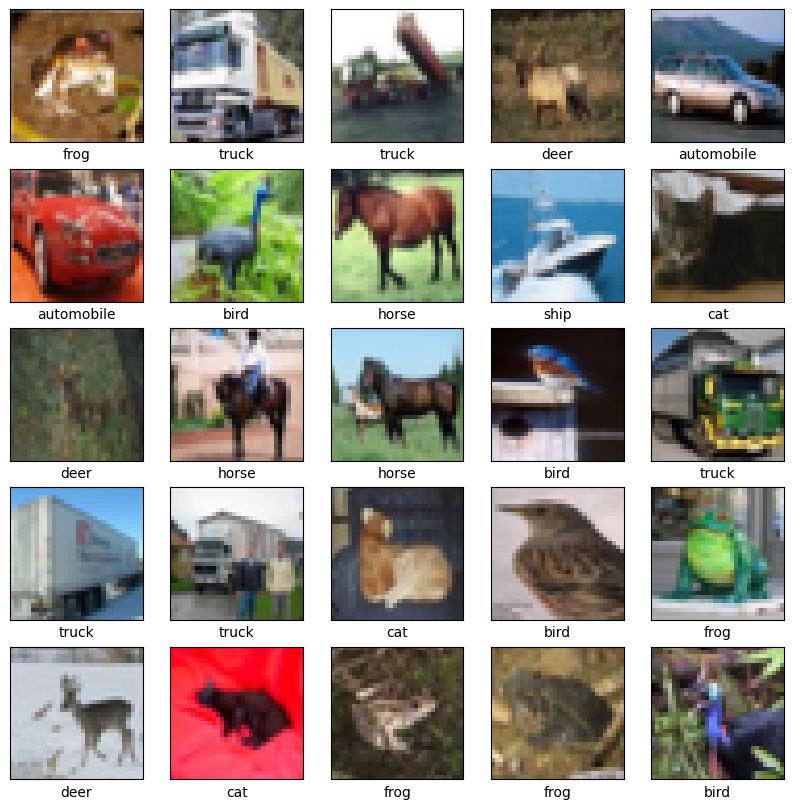

In [4]:
# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i][0]])
plt.show()


### 2. Data Augmentation

In [6]:
# Data augmentation

from keras.preprocessing.image import ImageDataGenerator

In [7]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)

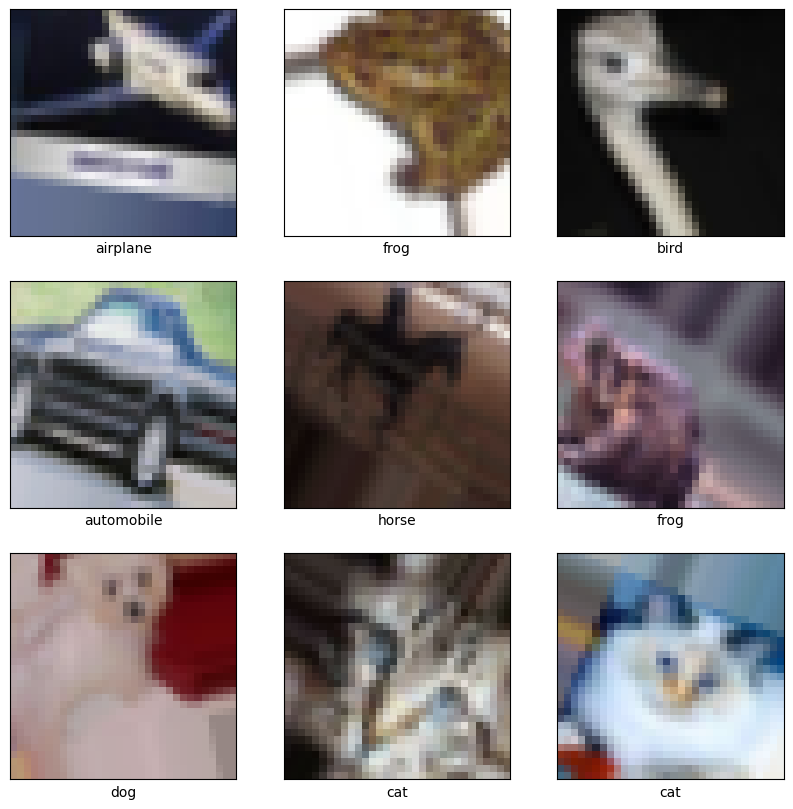

In [8]:
# Display augmented first 9 images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_batch[i].astype('uint8'))
        plt.xlabel(class_labels[y_batch[i][0]])

        plt.imshow(x_batch[i].astype('uint8'))

        plt.xlabel(class_labels[y_batch[i][0]])
    plt.show()
    break

### 3. Data splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Splitting the training data into training and validation data
x_train_split, x_val_split, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
print('x_train shape:', x_train_split.shape)
print('x_val shape:', x_val_split.shape)
print('X_test shape:', x_test.shape)

x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


In [11]:
# Normalize the data for better accuracy
x_train_final = x_train_split.astype('float32') / 255.0
x_val_final = x_val_split.astype('float32') / 255.0
x_test_final = x_test.astype('float32') / 255.0

In [12]:
from keras.utils import to_categorical

In [13]:
# Labels categorization

y_train_final = to_categorical(y_train, 10)
y_val_final = to_categorical(y_val, 10)
y_test_final = to_categorical(y_test, 10)

print("Train labels shape:", y_train_final.shape)
print("Validation labels shape:", y_val_final.shape)
print("Test labels shape:", y_test_final.shape)
print("Train labels example:", y_train_final[0])

Train labels shape: (40000, 10)
Validation labels shape: (10000, 10)
Test labels shape: (10000, 10)
Train labels example: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 4. Buidling the model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
# Initialize the model
model = Sequential()

In [16]:
# Add convolutional and max-pool layers

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

In [17]:
# Add flatten, dense, dropout and output layers

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (De

### 5. Compile and fit the model

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    x_train_final,
    y_train_final,
    epochs=5,
    batch_size=64,
    validation_data=(x_val_final, y_val_final)
)

Epoch 1/5
625/625 [==============================] - 22s 29ms/step - loss: 1.8029 - accuracy: 0.3371 - val_loss: 1.4935 - val_accuracy: 0.4619
Epoch 2/5
625/625 [==============================] - 16s 26ms/step - loss: 1.4665 - accuracy: 0.4703 - val_loss: 1.2628 - val_accuracy: 0.5506
Epoch 3/5
625/625 [==============================] - 17s 27ms/step - loss: 1.3320 - accuracy: 0.5260 - val_loss: 1.1394 - val_accuracy: 0.5889
Epoch 4/5
625/625 [==============================] - 16s 26ms/step - loss: 1.2183 - accuracy: 0.5693 - val_loss: 1.1069 - val_accuracy: 0.6046
Epoch 5/5
625/625 [==============================] - 17s 27ms/step - loss: 1.1408 - accuracy: 0.5990 - val_loss: 1.0064 - val_accuracy: 0.6444


In [22]:
# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(x_test_final, y_test_final)
print('Test loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 1.0217 - accuracy: 0.6364
Test loss: 1.0216513872146606


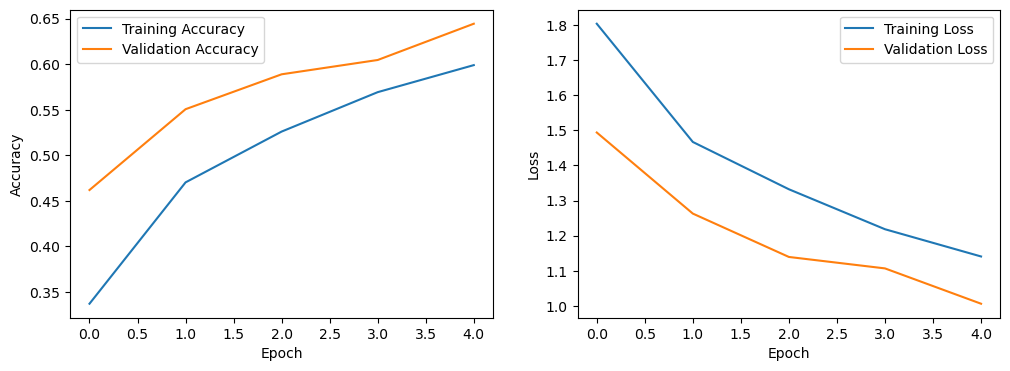

In [23]:
plt.figure(figsize = (12, 4))

# Plot the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')

plt.show()

In [24]:
y_predicted = model.predict(x_test_final)

313/313 [==============================] - 4s 13ms/step


In [25]:
import numpy as np

In [26]:
np.argmax(y_predicted[1])

8

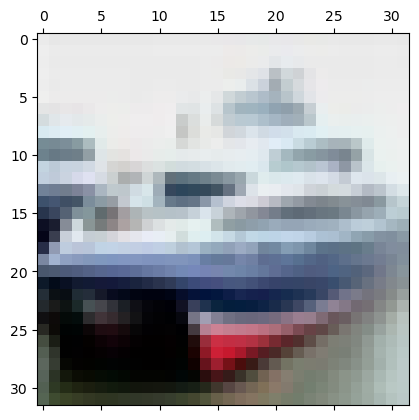

In [27]:
plt.matshow(x_test[1])

## Improving the model

### i. Hyper parameters tuning

In [ ]:
from kerastuner import HyperModel

In [ ]:
# Our HyperModel class

class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values = [3, 5]),
            activation='relu',
            input_shape=(32, 32, 3)
        ))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values = [3, 5]),
            activation='relu'
        ))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dropout(rate = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(10, activation='softmax'))

        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model


In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
# Initialize the tuner

tuner = RandomSearch(
    CNNHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='cnn_tuning'

)

# search for the best hyperparameters
tuner.search(
    x_train_final,
    y_train_final,
    epochs=10,
    validation_data=(x_val_final, y_val_final)
)

Trial 10 Complete [00h 05m 56s]
val_accuracy: 0.6318999826908112

Best val_accuracy So Far: 0.6737500131130219
Total elapsed time: 00h 58m 57s


In [ ]:
#Get the best hyperparameters
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f'''
The hyperparameters search is complete. The optimal number of units in the first dense layer is {best_model.get('dense_units')},
The optimal dropout rate is {best_model.get('dropout_1')},
The optimal number of filters in the first convolutional layer is {best_model.get('conv_1_filter')},
The optimal kernal size in the first convolutional layer is {best_model.get('conv_1_kernel')},
The optimal number of filters in the second convolutional layer is {best_model.get('conv_2_filter')},
The optimal kernal size in the second convolutional layer is {best_model.get('conv_2_kernel')}
''')


The hyperparameters search is complete. The optimal number of units in the first dense layer is 96,
The optimal dropout rate is 0.30000000000000004,
The optimal number of filters in the first convolutional layer is 80,
The optimal kernal size in the first convolutional layer is 5,
The optimal number of filters in the second convolutional layer is 48,
The optimal kernal size in the second convolutional layer is 3



### ii. Learning_rate adjusting

In [ ]:
from keras.callbacks import LearningRateScheduler

In [ ]:
#Define the learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Use learning rate sheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the learning rate scheduler
history = model.fit(
    x_train_final,
    y_train_final,
    epochs=20,
    batch_size=64,
    validation_data=(x_val_final, y_val_final),
    callbacks=[lr_scheduler]
)


Epoch 1/20
625/625 [==============================] - 14s 22ms/step - loss: 1.0798 - accuracy: 0.6194 - val_loss: 0.9804 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 14s 22ms/step - loss: 1.0175 - accuracy: 0.6428 - val_loss: 0.9297 - val_accuracy: 0.6668 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 17s 27ms/step - loss: 0.9719 - accuracy: 0.6569 - val_loss: 0.9489 - val_accuracy: 0.6749 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 15s 23ms/step - loss: 0.9286 - accuracy: 0.6740 - val_loss: 0.9394 - val_accuracy: 0.6793 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 14s 22ms/step - loss: 0.8822 - accuracy: 0.6901 - val_loss: 0.8991 - val_accuracy: 0.6874 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 14s 23ms/step - loss: 0.8451 - accuracy: 0.7018 - val_loss: 0.8759 - val_accuracy: 0.6951 - lr: 0.0010
Epoch 7/20
625/625 [==============================] - 15s 

### iii. Regularization and optimization

In [39]:
from keras.regularizers import l2

In [40]:
# Add l2 regularization to the model
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

# Add drouput layer
model.add(Dropout(0.5))

### iv. Handling imbalanced data

In [47]:
from sklearn.utils.class_weight import compute_class_weight

In [53]:
set(np.unique(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [64]:
y_train[0].flatten()

array([6], dtype=uint8)

In [63]:
class_weights = compute_class_weight('balanced', classes = np.unique(y_train), y = y_train.flatten())

class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(
    x_train_final,
    y_train_final,
    epochs=20,
    batch_size=64,
    validation_data=(x_val_final, y_val_final),
    class_weight=class_weights_dict
)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (64, 10) and (64, 64) are incompatible
